In [1]:
%matplotlib inline  


In [2]:
import sys
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [3]:
import numpy as np
import json

In [4]:
from scipy import stats

In [5]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

In [6]:
from lifelines.statistics import logrank_test


In [7]:
data = {
  'all_of_defaults': {
    'attrition': [],
    'lifetimes': [],
  },
  'half_of_defaults': {
    'attrition': [],
    'lifetimes': [],
  },
  'one': {
    'attrition': [],
    'lifetimes': [],
  }
}

In [130]:
#datatext = '{"all_of_defaults":{"lifetimes":[10,17,13,16,15,15,14,17,14,21,14,14,13,15,11,16,27,17,15,8,13,14,15,27,4,19,16,12,0,3,0,17,17,17,7,16,15,2,12,1,13,15,15,15,15,15,15,1,1,14,0,14,13,13,1,0,12,13,12,12,11,11,11,11,10,2,9,0,0,9,9,5,9,9,2,8,8,7,6,0,5,2,2,2,3,2,0],"attritions":[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]},"half_of_defaults":{"lifetimes":[14,15,16,15,15,13,26,16,6,14,16,11,6,17,17,13,15,21,0,25,2,12,0,16,1,16,16,1,15,0,15,15,0,14,0,0,14,14,14,14,0,11,2,0,11,10,0,8,9,9,1,9,7,8,8,1,7,7,5,0,3,2,2,1,1,0],"attritions":[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]},"one":{"lifetimes":[24,16,19,23,5,16,17,17,10,16,16,14,16,15,17,15,19,13,19,0,1,17,3,0,16,0,0,16,16,1,2,0,15,15,15,15,15,15,15,0,14,14,2,12,0,12,11,11,10,9,9,8,9,4,7,0,8,8,6,7,7,5,5,5,4,0],"attritions":[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[58,59,34,58,25,57,51,50,58,53,54,22,57,36,65,18,16,51,39,37,58,45,12,57,36,56,48,56,56,57,37,55,57,14,41,34,34,55,58,43,61,41,30,53,56,56,55,31,52,36,10,13,14,8,11,50,23,17,51,4,12,0,0,3,7,46,13,12,1,2,1,53,23,20,55,17,0,0,21,18,23,0,0,5,50,2,15,12,0,2,2,2,5,21,39,37,36,5,18,0,34,1],"attritions":[1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1]},"half_of_defaults":{"lifetimes":[68,39,41,36,41,36,56,58,55,44,43,58,46,51,47,54,59,56,56,37,49,35,37,17,12,37,27,35,37,49,18,40,57,53,46,56,39,57,34,36,66,35,20,25,6,6,23,30,17,44,15,0,2,1,12,0,1,56,18,56,0,0,0,0,21,19,0,2,0,0,22,1,17,7,46,0,4,31,39,0,32,0,1,6,0],"attritions":[1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]},"one":{"lifetimes":[57,31,56,57,59,65,55,37,51,55,58,22,54,58,49,36,37,37,58,56,37,48,52,37,57,54,35,52,36,57,46,36,24,55,42,21,40,56,58,51,51,49,66,5,55,24,16,19,62,58,0,1,0,3,0,0,1,2,0,55,20,0,54,11,12,18,0,49,6,2,0,1,0,6,36,6,9,1,0,5],"attritions":[0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,59,35,58,25,57,55,50,58,53,54,22,57,36,69,18,16,56,39,37,59,45,12,58,37,57,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,57,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,3,7,46,13,12,1,2,1,53,23,20,55,17,0,0,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,35,1],"attritions":[0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,43,58,46,52,47,55,59,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,23,30,17,44,15,0,2,1,12,0,1,57,18,57,0,0,0,0,21,19,0,2,0,0,22,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[57,31,56,58,61,65,55,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,47,36,24,55,42,21,41,57,59,52,51,50,66,5,55,24,16,19,62,58,0,1,0,3,0,0,1,2,0,56,20,0,55,11,12,18,0,50,6,2,0,1,0,6,37,6,9,1,0,5],"attritions":[0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,59,35,58,25,57,55,50,58,53,54,22,57,36,69,18,16,56,39,37,59,45,12,58,37,57,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,57,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,3,1,7,46,13,12,1,2,1,53,23,0,20,55,17,0,0,6,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,1,0,35,1],"attritions":[0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,43,58,46,52,47,55,59,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,23,30,17,3,44,15,0,2,1,1,12,0,0,0,1,57,18,1,57,0,0,0,0,21,19,0,2,0,0,22,1,17,7,46,0,0,4,31,41,0,32,0,1,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1]},"one":{"lifetimes":[55,57,31,56,58,61,65,55,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,47,36,24,55,42,21,41,57,59,52,51,50,66,5,55,24,16,19,62,58,1,0,0,1,0,0,3,0,0,1,2,0,0,56,20,0,55,11,12,18,0,50,6,2,0,1,0,6,37,6,0,9,1,0,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,59,35,58,25,57,55,50,58,53,54,22,57,36,69,18,16,56,39,37,59,45,12,58,37,57,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,57,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,3,7,46,13,12,1,2,1,53,23,20,55,17,0,0,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,35,1],"attritions":[0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,43,58,46,52,47,55,59,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,23,30,17,44,15,0,2,1,12,0,1,57,18,57,0,0,0,0,21,19,2,0,0,22,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[57,31,56,58,61,65,55,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,47,36,24,55,42,21,41,57,59,52,51,50,66,5,55,24,16,19,62,58,0,1,0,3,0,0,1,2,0,56,20,0,55,11,12,18,0,50,6,2,0,1,0,6,37,6,9,1,0,5],"attritions":[0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,59,35,58,25,57,55,50,58,53,54,22,57,36,69,18,16,56,39,37,59,45,12,58,37,57,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,57,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,3,1,7,46,13,12,1,2,1,53,23,0,20,55,17,0,0,6,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,1,0,35,1],"attritions":[0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,43,58,46,52,47,55,59,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,23,30,17,3,44,15,0,2,1,1,12,0,0,0,1,57,18,1,57,0,0,0,0,21,19,2,0,0,22,1,17,7,46,0,0,4,31,41,0,32,0,1,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1]},"one":{"lifetimes":[55,57,31,56,58,61,65,55,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,47,36,24,55,42,21,41,57,59,52,51,50,66,5,55,24,16,19,62,58,1,0,0,1,0,0,3,0,0,1,2,0,0,56,20,0,55,11,12,18,0,50,6,2,0,1,0,6,37,6,0,9,1,0,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,59,35,58,25,57,55,50,58,53,54,22,57,36,69,18,16,56,39,37,59,45,12,58,37,57,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,57,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,3,1,7,46,13,12,1,2,1,53,23,0,20,55,17,0,0,6,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,1,0,35,1],"attritions":[0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,43,58,46,52,47,55,59,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,23,30,17,3,44,15,0,2,1,1,12,0,0,0,1,57,18,1,57,0,0,0,0,21,19,2,0,0,22,1,17,7,46,0,0,4,31,41,0,32,0,1,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1]},"one":{"lifetimes":[55,57,31,56,58,61,65,55,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,47,36,24,55,42,21,41,57,59,52,51,50,66,5,55,24,16,19,62,58,1,0,0,1,0,0,3,0,0,1,2,0,0,56,20,0,55,11,12,18,0,50,6,2,0,1,0,6,37,6,0,9,1,0,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,59,35,58,25,57,55,50,58,53,54,22,57,36,69,18,16,56,39,37,59,45,12,58,37,57,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,57,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,3,1,7,46,13,12,1,2,1,53,23,0,20,55,17,0,0,6,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,1,0,35,1],"attritions":[0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,43,58,46,52,47,55,59,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,23,30,17,3,44,15,0,2,1,1,12,0,0,0,1,57,18,1,57,0,0,0,0,21,19,0,2,0,0,22,1,17,7,46,0,0,4,31,41,0,32,0,1,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1]},"one":{"lifetimes":[55,57,31,56,58,61,65,55,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,47,36,24,55,42,21,41,57,59,52,51,50,66,5,55,24,16,19,62,58,1,0,0,1,0,0,3,0,0,1,2,0,0,56,20,0,55,11,12,18,0,50,6,2,0,1,0,6,37,6,0,9,1,0,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,35,58,25,55,50,58,53,54,22,57,36,18,16,39,37,59,45,12,58,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,1,7,46,13,12,1,2,1,53,23,0,20,55,17,0,0,6,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,1,0,35,1],"attritions":[0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,58,47,55,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,30,17,3,44,0,1,1,12,0,0,1,57,18,1,57,0,0,0,0,21,19,0,0,1,17,7,46,0,0,4,31,0,0,1,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1]},"one":{"lifetimes":[55,57,31,56,58,61,65,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,36,55,42,41,57,59,52,51,50,66,5,55,24,19,62,58,1,0,1,0,0,3,0,0,1,2,0,0,56,20,0,55,11,12,18,0,50,6,2,1,0,6,37,6,0,9,1,0,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,36,37,55,55,56,59,51,56,35,54,58,58,54,40,49,57,25,55,52,50,50,58,53,35,58,54,22,48,22,57,36,36,18,16,57,37,49,50,40,39,57,62,37,59,45,12,58,58,53,43,49,59,56,57,57,37,56,41,58,14,59,41,34,35,35,36,55,37,59,43,56,54,46,61,42,37,59,57,56,56,30,54,32,58,58,56,56,59,31,53,37,10,13,43,14,8,11,50,23,8,14,17,51,54,9,42,3,4,0,65,66,4,64,3,12,0,58,0,14,0,1,7,54,46,2,47,0,13,56,1,12,1,2,1,57,1,53,10,23,28,0,0,14,20,1,56,55,17,0,0,6,54,21,53,1,13,18,53,1,52,23,0,2,0,5,51,51,2,18,1,49,15,12,0,2,16,2,1,2,5,11,2,0,21,39,2,36,37,2,37,37,5,18,1,0,1,0,4,35,1],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,56,39,41,43,58,41,54,36,51,43,30,56,37,56,58,57,58,56,45,55,55,36,37,65,17,49,58,54,36,37,47,19,55,56,61,48,56,56,57,37,49,36,62,37,37,17,53,12,37,39,27,44,50,35,56,37,50,59,59,18,65,50,41,54,50,58,16,53,53,44,47,57,42,56,56,50,59,39,49,51,57,58,51,47,59,57,46,35,37,37,53,57,37,13,48,67,53,36,50,20,25,9,6,6,3,14,11,30,9,17,5,3,44,5,3,6,0,24,1,0,1,1,12,1,0,57,0,38,1,57,1,18,1,57,57,0,57,57,0,0,0,0,2,21,27,19,1,0,13,5,0,51,19,0,50,51,50,1,14,16,51,12,17,7,0,46,0,12,47,25,5,2,0,4,21,31,42,1,0,1,0,1,1,37,6,1,2,6,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,52,55,54,57,31,59,56,58,47,51,54,61,65,37,37,39,42,59,37,23,51,55,12,57,59,57,37,50,56,56,22,57,58,50,58,33,49,59,37,58,37,30,37,57,59,38,57,36,59,57,57,37,48,52,50,50,47,37,51,57,51,54,42,52,56,36,43,56,57,53,52,37,37,58,58,58,49,36,35,32,37,56,55,36,37,46,42,57,56,69,57,57,51,41,57,59,29,58,46,59,40,48,59,57,38,37,64,57,56,52,52,51,37,47,50,58,44,66,16,5,2,55,41,24,12,14,3,12,9,19,72,43,51,62,3,58,2,1,0,0,0,15,25,59,1,0,17,34,0,3,1,45,0,0,0,11,1,22,1,2,2,0,57,56,8,0,0,56,10,7,56,20,17,48,0,55,54,2,11,20,13,0,51,0,12,18,0,2,50,6,49,47,1,2,3,1,6,1,0,6,37,9,6,0,9,1,0,0,5],"attritions":[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,35,58,25,55,50,58,53,54,22,57,36,18,16,39,37,59,45,12,58,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,1,7,46,13,12,1,2,1,53,23,0,20,55,17,0,0,6,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,1,0,35,1],"attritions":[0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,58,47,55,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,30,17,3,44,0,1,1,12,0,0,1,57,18,1,57,0,0,0,0,21,19,0,0,0,1,17,7,46,0,0,4,31,0,0,1,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1]},"one":{"lifetimes":[55,57,31,56,58,61,65,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,36,55,42,41,57,59,52,51,50,66,5,55,24,19,62,58,1,0,1,0,0,3,0,0,1,2,0,0,56,20,0,55,11,12,18,0,50,6,2,1,0,6,37,6,0,9,1,0,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,36,37,55,55,56,59,51,56,35,54,58,58,54,40,49,57,25,55,52,50,50,58,53,35,58,54,22,48,22,57,36,36,18,16,57,37,49,50,40,39,57,62,37,59,45,12,58,58,53,43,49,59,56,57,57,37,56,41,58,14,59,41,34,35,35,36,55,37,59,43,56,54,46,61,42,37,59,57,56,56,30,54,32,58,58,56,56,59,31,53,37,10,13,43,14,8,11,50,23,8,14,17,51,54,9,42,3,4,0,65,66,4,64,3,12,0,58,0,14,0,1,7,54,46,2,47,0,13,56,1,12,1,2,1,57,1,53,10,23,28,0,0,14,20,1,56,55,17,0,0,6,54,21,53,1,13,18,53,1,52,23,0,2,0,5,51,51,2,18,1,49,15,12,0,2,16,2,1,2,5,11,2,0,21,39,2,36,37,2,37,37,5,18,1,0,1,0,4,35,1],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,56,39,41,43,58,41,54,36,51,43,30,56,37,56,58,57,58,56,45,55,55,36,37,65,17,49,58,54,36,37,47,19,55,56,61,48,56,56,57,37,49,36,62,37,37,17,53,12,37,39,27,44,50,35,56,37,50,59,59,18,65,50,41,54,50,58,16,53,53,44,47,57,42,56,56,50,59,39,49,51,57,58,51,47,59,57,46,35,37,37,53,57,37,13,48,67,53,36,50,20,25,9,6,6,3,14,11,30,9,17,5,3,44,5,3,6,0,24,1,0,1,1,12,1,0,57,0,38,1,57,1,18,1,57,57,0,57,57,0,0,0,0,2,21,27,19,1,0,13,0,5,0,51,19,0,50,51,50,1,14,16,51,12,17,7,0,46,0,12,47,25,5,2,0,4,21,31,42,1,0,1,0,1,1,37,6,1,2,6,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,52,55,54,57,31,59,56,58,47,51,54,61,65,37,37,39,42,59,37,23,51,55,12,57,59,57,37,50,56,56,22,57,58,50,58,33,49,59,37,58,37,30,37,57,59,38,57,36,59,57,57,37,48,52,50,50,47,37,51,57,51,54,42,52,56,36,43,56,57,53,52,37,37,58,58,58,49,36,35,32,37,56,55,36,37,46,42,57,56,69,57,57,51,41,57,59,29,58,46,59,40,48,59,57,38,37,64,57,56,52,52,51,37,47,50,58,44,66,16,5,2,55,41,24,12,14,3,12,9,19,72,43,51,62,3,58,2,1,0,0,0,15,25,59,1,0,17,34,0,3,1,45,0,0,0,11,1,22,1,2,2,0,57,56,8,0,0,56,10,7,56,20,17,48,0,55,54,2,11,20,13,0,51,0,12,18,0,2,50,6,49,47,1,2,3,1,6,1,0,6,37,9,6,0,9,1,0,0,5],"attritions":[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,36,37,55,55,56,59,51,56,35,54,58,58,54,40,49,57,25,55,52,50,50,58,53,35,58,54,22,48,22,57,36,36,18,16,57,37,49,50,40,39,57,62,37,59,45,12,58,58,53,43,49,59,56,57,57,37,56,41,58,14,59,41,34,35,35,36,55,37,59,43,56,54,46,61,42,37,59,57,56,56,30,54,32,58,58,56,56,59,31,53,37,10,13,43,14,8,11,50,23,8,14,17,51,54,9,42,3,4,65,66,4,64,3,12,0,58,0,14,0,7,54,46,2,47,0,13,56,1,12,1,2,1,57,1,53,10,23,28,0,14,20,1,56,55,17,0,0,54,21,53,1,13,18,53,1,52,23,0,2,0,5,51,51,2,18,1,49,15,12,0,2,16,2,1,2,5,11,2,0,21,39,2,36,37,2,37,37,5,18,1,0,4,35,1],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,56,39,41,43,58,41,54,36,51,43,30,56,37,56,58,57,58,56,45,55,55,36,37,65,17,49,58,54,36,37,47,19,55,56,61,48,56,56,57,37,49,36,62,37,37,17,53,12,37,39,27,44,50,35,56,37,50,59,59,18,65,50,41,54,50,58,16,53,53,44,47,57,42,56,56,50,59,39,49,51,57,58,51,47,59,57,46,35,37,37,53,57,37,13,48,67,53,36,50,20,25,9,6,6,3,14,11,30,9,17,5,44,5,3,6,0,24,1,1,12,1,57,38,1,57,1,18,57,57,0,57,57,0,0,0,0,2,21,27,19,1,0,13,5,0,51,19,0,50,51,50,1,14,16,51,12,17,7,0,46,12,47,25,5,2,0,4,21,31,42,0,1,0,1,1,37,6,2,6,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1]},"one":{"lifetimes":[37,52,54,57,31,59,56,58,47,51,54,61,65,37,37,39,42,59,37,23,51,55,12,57,59,57,37,50,56,56,22,57,58,50,58,33,49,59,37,58,37,30,37,57,59,38,57,36,59,57,57,37,48,52,50,50,47,37,51,57,51,54,42,52,56,36,43,56,57,53,52,37,37,58,58,58,49,36,35,32,37,56,55,36,37,46,42,57,56,69,57,57,51,41,57,59,29,58,46,59,40,48,59,57,38,37,64,57,56,52,52,51,37,47,50,58,44,66,16,5,2,55,41,24,12,14,3,12,9,19,72,43,51,62,3,58,2,0,0,0,15,25,59,1,17,34,0,3,1,45,0,0,0,11,1,22,1,2,2,0,57,56,8,0,56,7,56,20,17,48,0,55,54,2,11,20,13,0,51,0,12,18,0,2,50,6,49,47,1,2,3,1,6,1,0,6,37,9,6,9,1,0,5],"attritions":[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[59,35,58,25,55,50,58,53,54,22,57,36,18,16,39,37,59,45,12,58,49,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,30,54,58,56,31,53,37,10,13,14,8,11,50,23,17,51,4,12,0,0,7,46,13,12,1,2,1,53,23,20,55,17,0,0,21,18,23,0,0,5,51,2,15,12,0,2,2,2,5,21,39,37,37,5,18,0,35,1],"attritions":[0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,39,41,43,41,37,56,58,56,45,58,47,55,56,56,37,49,37,37,17,12,37,27,35,37,50,18,41,58,53,47,56,39,57,35,37,67,36,20,25,6,6,30,17,44,0,1,12,1,57,18,57,0,0,0,0,21,19,0,0,1,17,7,46,0,4,31,0,0,1,6,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]},"one":{"lifetimes":[57,31,56,58,61,65,37,51,55,59,22,57,58,49,37,37,37,59,57,37,48,52,37,57,54,36,53,37,58,36,55,42,41,57,59,52,51,50,66,5,55,24,19,62,58,0,1,0,3,0,0,1,2,0,56,20,0,55,11,12,18,0,50,6,2,1,0,6,37,6,9,1,0,5],"attritions":[0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1]}}'
datatext = '{"all_of_defaults":{"lifetimes":[56,59,59,51,56,35,58,54,40,25,57,55,50,58,53,54,56,22,31,57,36,18,16,48,37,39,62,37,59,45,12,58,37,59,49,50,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,56,30,54,43,53,58,56,37,31,53,37,55,28,10,13,14,8,11,50,23,17,5,51,4,12,0,0,31,7,46,13,12,1,2,1,53,23,20,20,55,17,0,0,21,18,23,0,0,5,51,0,51,2,15,12,0,2,2,2,5,21,39,37,37,5,37,18,0,1,35,1],"attritions":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,41,51,56,37,56,58,58,56,45,58,46,47,19,55,59,56,56,37,49,37,37,37,17,12,37,27,35,37,50,18,65,41,67,58,53,53,47,56,56,39,57,57,35,37,37,67,36,20,25,6,57,6,23,30,17,44,15,9,0,2,1,1,15,12,1,57,18,57,0,0,0,0,9,21,27,19,0,13,2,0,19,0,22,51,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,57,31,56,58,51,61,65,56,55,37,51,55,59,56,22,57,50,58,57,49,37,38,37,37,59,57,59,37,37,48,54,52,37,57,51,54,42,56,36,37,43,53,37,37,58,58,47,36,56,55,33,46,42,41,57,59,58,35,52,51,50,66,29,5,55,24,6,41,16,12,19,62,58,0,1,0,0,3,0,0,11,1,2,2,0,56,8,56,56,20,0,55,11,12,18,0,50,6,2,4,1,0,6,37,6,9,1,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,36,37,55,59,56,55,56,59,51,56,35,54,58,58,56,35,54,40,49,57,25,55,57,55,52,50,50,58,59,53,35,58,54,22,48,12,58,56,22,31,57,36,36,18,16,57,48,37,49,50,40,39,57,62,37,59,45,46,12,45,58,58,53,37,43,59,49,58,59,50,56,57,57,57,37,56,41,58,14,59,41,34,35,35,36,55,59,37,59,43,56,59,54,46,61,42,37,59,56,37,57,56,59,56,56,30,54,43,53,59,32,58,58,56,56,59,37,31,53,37,55,28,10,13,13,43,14,8,11,50,23,8,14,17,5,51,54,9,42,3,4,62,65,66,4,64,3,12,0,58,58,0,14,31,0,7,54,46,2,47,56,0,13,56,1,12,1,2,1,57,1,57,53,10,7,23,28,0,14,20,1,20,56,55,17,0,56,0,54,21,53,1,13,18,53,1,52,23,0,2,0,5,51,0,51,2,18,1,49,15,12,0,2,16,2,1,2,5,11,2,0,21,39,2,36,37,2,37,37,5,37,18,1,0,1,4,35,1],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,58,41,54,36,51,43,30,56,37,56,58,57,58,56,45,55,58,55,36,54,37,59,55,65,17,49,50,53,58,54,46,36,37,47,19,55,52,59,56,61,48,56,35,56,57,37,49,37,56,59,36,62,37,37,17,49,53,12,37,39,27,51,44,50,35,54,56,37,50,59,59,18,36,65,50,41,54,56,50,67,58,16,53,53,44,47,57,42,58,56,56,50,59,39,49,51,57,58,51,47,59,41,57,57,46,35,37,37,61,53,72,57,37,13,48,67,56,53,36,50,20,25,9,12,6,57,6,3,23,14,11,30,9,17,5,44,5,15,9,3,6,0,24,1,2,1,1,15,58,12,1,57,38,1,57,1,18,27,0,57,57,0,57,57,0,0,0,0,56,2,9,21,27,19,55,1,0,13,15,2,5,0,51,10,19,0,50,22,51,50,2,1,14,16,51,12,17,9,7,0,46,12,47,25,5,2,0,4,21,31,42,41,0,1,32,0,1,1,37,6,2,6,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1]},"one":{"lifetimes":[37,52,50,54,57,31,59,37,56,58,47,58,51,54,61,65,59,37,56,37,59,39,42,43,55,59,37,23,51,55,12,57,59,56,34,57,37,50,56,56,22,58,57,27,58,50,58,57,33,49,36,59,59,37,38,58,37,30,37,57,69,59,38,57,36,59,57,59,57,37,37,48,54,52,50,50,47,56,37,51,57,51,54,42,52,56,36,37,43,56,57,57,53,52,37,37,37,58,58,58,47,49,36,35,32,37,56,56,55,33,36,37,46,42,57,56,54,69,57,57,51,41,57,59,29,52,58,46,59,40,48,57,58,57,59,35,57,38,37,64,57,50,56,52,52,38,51,37,47,50,58,52,44,66,16,29,5,2,55,57,41,24,12,6,41,14,43,16,3,12,9,73,19,72,43,51,62,3,58,2,0,7,0,0,15,25,59,1,0,0,17,34,0,3,1,45,0,0,0,11,1,2,22,1,6,2,2,0,57,56,8,0,56,7,56,20,17,19,48,0,55,54,2,11,20,13,23,0,51,0,12,18,0,2,50,6,49,47,1,2,3,1,4,6,1,0,6,37,9,6,9,1,2,0,5],"attritions":[0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,36,37,55,59,56,55,56,59,51,56,35,54,58,58,56,35,54,40,49,57,25,55,57,55,52,50,50,58,59,53,35,58,54,22,48,12,58,56,22,31,57,36,36,18,16,57,48,37,49,50,40,39,57,62,37,59,45,46,12,45,58,58,53,37,43,59,49,58,59,50,56,57,57,57,37,56,41,58,14,59,41,34,35,35,36,55,59,37,59,43,56,59,54,46,61,42,37,59,56,37,57,56,59,56,56,30,54,43,53,59,32,58,58,56,56,59,37,31,53,37,55,28,10,13,13,43,14,8,11,50,23,8,14,17,5,51,54,9,42,3,4,62,65,66,4,64,3,12,0,58,58,0,14,31,0,7,54,46,2,47,56,0,13,56,1,12,1,2,1,57,1,57,53,10,7,23,28,0,14,20,1,20,56,55,17,0,56,0,54,21,53,1,13,18,53,1,52,23,0,2,0,5,51,0,51,2,18,1,49,15,12,0,2,16,2,1,2,5,11,2,0,21,39,2,36,37,2,37,37,5,37,18,1,0,1,4,35,1],"attritions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,58,41,54,36,51,43,30,56,37,56,58,57,58,56,45,55,58,55,36,54,37,59,55,65,17,49,50,53,58,54,46,36,37,47,19,55,52,59,56,61,48,56,35,56,57,37,49,37,56,59,36,62,37,37,17,49,53,12,37,39,27,51,44,50,35,54,56,37,50,59,59,18,36,65,50,41,54,56,50,67,58,16,53,53,44,47,57,42,58,56,56,50,59,39,49,51,57,58,51,47,59,41,57,57,46,35,37,37,61,53,72,57,37,13,48,67,56,53,36,50,20,25,9,12,6,57,6,3,23,14,11,30,9,17,5,44,5,15,9,3,6,0,24,1,2,1,1,15,58,12,1,57,38,1,57,1,18,27,0,57,57,0,57,57,0,0,0,0,56,2,9,21,27,19,55,1,0,13,15,2,5,0,51,10,19,0,50,22,51,50,2,1,14,16,51,12,17,9,7,0,46,12,47,25,5,2,0,4,21,31,42,41,0,1,32,0,1,1,37,6,2,6,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1]},"one":{"lifetimes":[37,52,50,54,57,31,59,37,56,58,47,58,51,54,61,65,59,37,56,37,59,39,42,43,55,59,37,23,51,55,12,57,59,56,34,57,37,50,56,56,22,58,57,27,58,50,58,57,33,49,36,59,59,37,38,58,37,30,37,57,69,59,38,57,36,59,57,59,57,37,37,48,54,52,50,50,47,56,37,51,57,51,54,42,52,56,36,37,43,56,57,57,53,52,37,37,37,58,58,58,47,49,36,35,32,37,56,56,55,33,36,37,46,42,57,56,54,69,57,57,51,41,57,59,29,52,58,46,59,40,48,57,58,57,59,35,57,38,37,64,57,50,56,52,52,38,51,37,47,50,58,52,44,66,16,29,5,2,55,57,41,24,12,6,41,14,43,16,3,12,9,73,19,72,43,51,62,3,58,2,0,7,0,0,15,25,59,1,0,0,17,34,0,3,1,45,0,0,0,11,1,2,22,1,6,2,2,0,57,56,8,0,56,7,56,20,17,19,48,0,55,54,2,11,20,13,23,0,51,0,12,18,0,2,50,6,49,47,1,2,3,1,4,6,1,0,6,37,9,6,9,1,2,0,5],"attritions":[0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,59,59,51,56,35,58,54,40,25,57,55,50,58,53,54,56,22,31,57,36,18,16,48,37,39,62,37,59,45,12,58,37,59,49,50,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,56,30,54,43,53,58,56,37,31,53,37,55,28,10,13,14,8,11,50,23,17,5,51,4,12,0,0,31,7,46,13,12,1,2,1,53,23,20,20,55,17,0,0,21,18,23,0,0,5,51,0,51,2,15,12,0,2,2,2,5,21,39,37,37,5,37,18,0,1,35,1],"attritions":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,41,51,56,37,56,58,58,56,45,58,46,47,19,55,59,56,56,37,49,37,37,37,17,12,37,27,35,37,50,18,65,41,67,58,53,53,47,56,56,39,57,57,35,37,37,67,36,20,25,6,57,6,23,30,17,44,15,9,0,2,1,1,15,12,1,57,18,57,0,0,0,0,9,21,27,19,0,13,2,0,19,0,22,51,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,57,31,56,58,51,61,65,56,55,37,51,55,59,56,22,57,50,58,57,49,37,38,37,37,59,57,59,37,37,48,54,52,37,57,51,54,42,56,36,37,43,53,37,37,58,58,47,36,56,55,33,46,42,41,57,59,58,35,52,51,50,66,29,5,55,24,6,41,16,12,19,62,58,0,1,0,0,3,0,0,11,1,2,2,0,56,8,56,56,20,0,55,11,12,18,0,50,6,2,4,1,0,6,37,6,9,1,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,59,59,51,56,35,58,54,40,25,57,55,50,58,53,54,56,22,31,57,36,18,16,48,37,39,62,37,59,45,12,58,37,59,49,50,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,56,30,54,43,53,58,56,37,31,53,37,55,28,10,13,14,8,11,50,23,17,5,51,4,12,0,0,31,7,46,13,12,1,2,1,53,23,20,20,55,17,0,0,21,18,23,0,0,5,51,0,51,2,15,12,0,2,2,2,5,21,39,37,37,5,37,18,0,1,35,1],"attritions":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,41,51,56,37,56,58,58,56,45,58,46,47,19,55,59,56,56,37,49,37,37,37,17,12,37,27,35,37,50,18,65,41,67,58,53,53,47,56,56,39,57,57,35,37,37,67,36,20,25,6,57,6,23,30,17,44,15,9,0,2,1,1,15,12,1,57,18,57,0,0,0,0,9,21,27,19,0,13,2,0,19,0,22,51,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,57,31,56,58,51,61,65,56,55,37,51,55,59,56,22,57,50,58,57,49,37,38,37,37,59,57,59,37,37,48,54,52,37,57,51,54,42,56,36,37,43,53,37,37,58,58,47,36,56,55,33,46,42,41,57,59,58,35,52,51,50,66,29,5,55,24,6,41,16,12,19,62,58,0,1,0,0,3,0,0,11,1,2,2,0,56,8,56,56,20,0,55,11,12,18,0,50,6,2,4,1,0,6,37,6,9,1,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'
datatext = '{"all_of_defaults":{"lifetimes":[56,59,59,51,56,35,58,54,40,25,57,55,50,58,53,54,56,22,31,57,36,18,16,48,37,39,62,37,59,45,12,58,37,59,49,50,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,56,30,54,43,53,58,56,37,31,53,37,55,28,10,13,14,8,11,50,23,17,5,51,4,12,0,0,31,7,46,13,12,1,2,1,53,23,20,20,55,17,0,0,21,18,23,0,0,5,51,0,51,2,15,12,0,2,2,2,5,21,39,37,37,5,37,18,0,1,35,1],"attritions":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,41,51,56,37,56,58,58,56,45,58,46,47,19,55,59,56,56,37,49,37,37,37,17,12,37,27,35,37,50,18,65,41,67,58,53,53,47,56,56,39,57,57,35,37,37,67,36,20,25,6,57,6,23,30,17,44,15,9,0,2,1,1,15,12,1,57,18,57,0,0,0,0,9,21,27,19,0,13,2,0,19,0,22,51,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,57,31,56,58,51,61,65,56,55,37,51,55,59,56,22,57,50,58,57,49,37,38,37,37,59,57,59,37,37,48,54,52,37,57,51,54,42,56,36,37,43,53,37,37,58,58,47,36,56,55,33,46,42,41,57,59,58,35,52,51,50,66,29,5,55,24,6,41,16,12,19,62,58,0,1,0,0,3,0,0,11,1,2,2,0,56,8,56,56,20,0,55,11,12,18,0,50,6,2,4,1,0,6,37,6,9,1,0,5],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'
#datatext = '{"all_of_defaults":{"lifetimes":[56,59,59,51,56,35,58,54,40,25,57,55,50,58,53,54,56,22,31,57,36,18,16,48,37,39,62,37,59,45,12,58,37,59,49,50,56,57,57,37,56,58,14,41,34,35,55,59,43,61,42,56,30,54,43,53,58,56,37,31,53,37,55,28,10,13,14,8,11,50,23,17,5,51,4,12,0,0,31,7,46,13,12,1,2,1,53,23,20,20,55,17,0,0,21,18,23,0,0,5,51,0,51,2,15,12,0,2,2,2,5,21,39,37,37,5,37,18,0,1,35,1],"attritions":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1]},"half_of_defaults":{"lifetimes":[68,51,31,56,39,41,43,41,51,56,37,56,58,58,56,45,58,46,47,19,55,59,56,56,37,49,37,37,37,17,12,37,27,35,37,50,18,65,41,67,58,53,53,47,56,56,39,57,57,35,37,37,67,36,20,25,6,57,6,23,30,17,44,15,9,0,2,1,1,15,12,1,57,18,57,0,0,0,0,9,21,27,19,0,13,0,2,0,19,0,22,51,1,17,7,46,0,4,31,41,0,32,0,1,6,0],"attritions":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1]},"one":{"lifetimes":[37,57,31,56,58,51,61,65,56,55,37,51,55,59,56,22,57,50,58,57,49,37,38,37,37,59,57,59,37,37,48,54,52,37,57,51,54,42,56,36,37,43,53,37,37,58,58,47,36,56,55,33,46,42,41,57,59,58,35,52,51,50,66,29,5,55,24,6,41,16,12,19,62,58,0,1,0,0,3,0,0,11,1,2,2,0,56,8,56,56,20,0,55,11,12,18,0,50,6,2,4,1,0,6,37,6,9,1,0,5],"attritions":[0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1]}}'

data = json.loads(datatext)


all_lifetimes = []
all_attritions = []
one_lifetimes = []
one_attritions = []

print('condition,attritioned,lifetime')
for idx,lifetime in enumerate(data['all_of_defaults']['lifetimes']):
  attritioned = data['all_of_defaults']['attritions'][idx]
  #if lifetime > 60:
  #  attritioned = 0
  #  lifetime = 30
  all_lifetimes.append(lifetime)
  all_attritions.append(attritioned)
print('condition,attritioned,lifetime')
for idx,lifetime in enumerate(data['half_of_defaults']['lifetimes']):
  attritioned = data['half_of_defaults']['attritions'][idx]
  #if lifetime > 60:
  #  attritioned = 0
  #  lifetime = 30
  all_lifetimes.append(lifetime)
  all_attritions.append(attritioned)
for idx,lifetime in enumerate(data['one']['lifetimes']):
  attritioned = data['one']['attritions'][idx]
  #if lifetime > 60:
  #  attritioned = 0
  #  lifetime = 30
  one_lifetimes.append(lifetime)
  one_attritions.append(attritioned)
  #print(','.join(['same', str(attritioned), str(lifetime)]))

results = logrank_test(all_lifetimes, one_lifetimes, event_observed_A=all_attritions, event_observed_B=one_attritions)
#results = logrank_test(data['all_of_defaults']['lifetimes'], data['one']['lifetimes'], event_observed_A=data['all_of_defaults']['attritions'], event_observed_B=data['one']['attritions'])
print(results)

condition,attritioned,lifetime
condition,attritioned,lifetime
<lifelines.StatisticalResult: 

null_distribution=chi squared, alpha=0.95, t_0=-1, df=1

test_statistic      p   
        4.2701 0.0388  *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [133]:
datatext = '{"changed":{"lifetimes":[59,37,38,56,51,52,50,36,37,58,73,21,59,55,54,56,55,56,38,58,59,37,52,59,54,24,58,56,35,47,54,58,36,49,45,54,57,51,29,58,55,59,57,52,37,73,50,48,57,63,59,37,59,39,42,35,43,56,58,50,36,22,42,59,59,72,43,42,37,71,37,23,30,36,59,48,12,12,57,49,37,58,57,36,47,57,57,69,34,49,58,51,57,55,58,37,50,48,39,57,55,56,56,36,58,51,43,32,54,37,49,50,27,59,55,36,58,65,56,17,40,57,49,50,53,52,33,54,57,59,36,52,56,16,36,59,37,59,59,59,36,58,62,58,64,46,55,56,37,58,52,58,30,57,69,45,58,51,50,53,56,51,61,57,43,12,50,48,38,57,36,59,35,57,59,37,49,57,56,54,58,51,59,36,62,59,55,70,46,56,56,49,49,53,50,50,47,55,39,37,56,49,57,35,57,56,51,51,41,26,51,44,50,44,59,49,54,58,52,56,39,56,59,57,57,59,59,58,59,52,37,50,57,57,58,59,36,46,35,50,36,54,49,59,57,49,57,56,50,35,59,41,37,32,24,37,36,51,56,49,56,59,45,16,54,36,37,42,72,46,44,50,55,20,57,57,59,37,42,58,59,56,37,57,45,57,44,21,59,56,52,54,56,50,69,56,59,36,57,57,57,51,58,45,43,55,29,49,51,58,52,46,59,55,40,48,58,57,59,51,47,57,59,58,57,59,51,57,51,59,59,57,38,47,32,37,57,41,58,57,52,64,57,46,56,57,50,56,61,70,53,52,37,56,72,35,46,59,38,57,49,57,37,59,13,48,56,31,57,37,43,47,57,52,58,53,57,56,46,29,53,59,58,51,57,58,47,58,37,43,50,54,57,52,44,9,13,16,55,18,20,25,43,26,12,26,9,2,8,57,41,12,3,20,3,43,56,57,8,14,7,59,14,14,56,11,11,6,6,34,43,54,9,15,9,3,5,19,34,31,43,9,5,8,73,28,42,17,72,3,4,43,26,62,5,3,6,23,51,9,0,65,66,0,3,64,5,2,61,3,2,0,13,2,4,0,58,58,16,0,24,1,14,0,5,26,4,3,1,7,0,17,15,25,0,59,4,0,26,0,20,4,0,1,0,1,17,2,20,34,29,1,10,1,12,58,45,1,0,28,9,0,0,0,1,57,22,54,1,38,2,58,0,2,0,0,9,47,21,56,0,1,27,1,22,13,56,2,58,1,1,27,2,5,0,58,6,57,4,57,1,0,57,2,57,10,57,7,19,57,0,28,22,0,0,0,1,0,14,0,1,0,56,56,2,7,0,55,52,56,17,1,19,48,52,0,10,54,54,54,15,2,4,5,53,9,1,13,20,53,3,52,18,1,51,52,11,13,1,12,23,51,10,0,11,4,50,13,51,2,9,0,51,11,50,0,2,14,16,21,51,3,18,12,1,0,46,9,2,0,2,15,49,50,3,49,17,1,47,17,12,16,47,16,25,5,2,1,0,11,44,2,43,13,1,21,2,42,0,0,0,3,40,1,0,38,2,6,36,0,26,7,2,37,37,1,1,9,7,1,36,1,3,37,1,1,2,7,6,2,6,4,0,0,0],"attritions":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]},"nochanged":{"lifetimes":[56,37,68,51,31,56,39,41,43,59,57,59,51,31,56,35,41,56,58,58,54,40,51,25,61,65,57,55,50,58,56,51,53,54,55,37,51,56,55,37,56,59,22,56,58,31,57,56,36,58,56,45,18,16,48,37,22,57,50,58,57,58,39,49,46,62,37,59,45,47,19,37,38,55,37,12,59,37,58,37,59,59,56,57,56,37,59,49,37,37,49,37,48,50,37,37,17,54,56,57,52,12,57,37,27,37,37,56,57,51,58,14,54,42,35,37,56,50,36,37,43,53,37,37,18,58,41,34,58,35,65,41,55,47,36,59,67,58,56,43,55,53,33,53,61,42,46,47,42,56,56,56,39,41,57,59,57,58,30,54,35,43,53,58,57,35,37,56,37,52,51,37,31,67,53,50,37,36,55,66,20,25,28,10,13,29,14,8,5,55,11,6,57,24,50,6,23,6,41,23,17,30,5,51,16,17,12,44,15,19,9,0,62,4,58,12,0,0,0,2,1,31,0,1,0,3,1,15,0,0,12,11,7,46,1,57,13,1,18,12,1,2,1,57,2,2,0,56,53,8,23,20,0,20,0,0,0,56,56,9,55,20,21,17,27,0,19,0,0,0,55,13,0,11,2,21,0,18,23,19,0,0,22,0,5,51,51,0,51,12,1,2,18,17,7,0,50,6,46,15,12,0,2,2,0,2,5,4,31,2,41,21,4,39,37,1,0,6,37,37,0,5,37,6,32,0,18,1,9,1,0,0,1,6,35,5,1,0],"attritions":[0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1]}}'

data = json.loads(datatext)

results = logrank_test(data['changed']['lifetimes'], data['nochanged']['lifetimes'], event_observed_A=data['changed']['attritions'], event_observed_B=data['nochanged']['attritions'])
print(results)

<lifelines.StatisticalResult: 

null_distribution=chi squared, alpha=0.95, t_0=-1, df=1

test_statistic      p   
        3.8578 0.0495  *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [134]:
print('condition,attritioned,lifetime')
for idx,lifetime in enumerate(data['changed']['lifetimes']):
  attritioned = data['changed']['attritions'][idx]
  print(','.join(['changed', str(attritioned), str(lifetime)]))
for idx,lifetime in enumerate(data['nochanged']['lifetimes']):
  attritioned = data['nochanged']['attritions'][idx]
  print(','.join(['nochanged', str(attritioned), str(lifetime)]))

condition,attritioned,lifetime
changed,0,59
changed,0,37
changed,0,38
changed,0,56
changed,0,51
changed,0,52
changed,0,50
changed,0,36
changed,0,37
changed,0,58
changed,0,73
changed,1,21
changed,0,59
changed,0,55
changed,0,54
changed,0,56
changed,0,55
changed,0,56
changed,0,38
changed,0,58
changed,0,59
changed,1,37
changed,0,52
changed,0,59
changed,0,54
changed,1,24
changed,0,58
changed,0,56
changed,0,35
changed,0,47
changed,0,54
changed,0,58
changed,0,36
changed,0,49
changed,0,45
changed,0,54
changed,0,57
changed,0,51
changed,1,29
changed,0,58
changed,0,55
changed,0,59
changed,0,57
changed,0,52
changed,0,37
changed,0,73
changed,0,50
changed,0,48
changed,0,57
changed,0,63
changed,0,59
changed,0,37
changed,0,59
changed,0,39
changed,1,42
changed,0,35
changed,0,43
changed,0,56
changed,0,58
changed,0,50
changed,0,36
changed,1,22
changed,0,42
changed,0,59
changed,0,59
changed,0,72
changed,0,43
changed,0,42
changed,0,37
changed,0,71
changed,0,37
changed,1,23
changed,1,30
changed,0,36
changed

In [43]:
print(data)
print(len(data['all_of_defaults']['lifetimes']))
print(len(data['one']['lifetimes']))

{'all_of_defaults': {'lifetimes': [59, 59, 35, 58, 25, 57, 55, 50, 58, 53, 54, 22, 57, 36, 69, 18, 16, 56, 39, 37, 59, 45, 12, 58, 37, 57, 49, 56, 57, 57, 37, 56, 58, 14, 41, 34, 35, 55, 59, 43, 61, 42, 30, 54, 57, 58, 56, 31, 53, 37, 10, 13, 14, 8, 11, 50, 23, 17, 51, 4, 12, 0, 0, 3, 7, 46, 13, 12, 1, 2, 1, 53, 23, 20, 55, 17, 0, 0, 21, 18, 23, 0, 0, 5, 51, 2, 15, 12, 0, 2, 2, 2, 5, 21, 39, 37, 37, 5, 18, 0, 35, 1], 'attritions': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]}, 'one': {'lifetimes': [57, 31, 56, 58, 61, 65, 55, 37, 51, 55, 59, 22, 57, 58, 49, 37, 37, 37, 59, 57, 37, 48, 52, 37, 57, 54, 36, 53, 37, 58, 47, 36, 24, 55, 42, 21, 41, 57, 59, 52, 51, 50, 66, 5, 55, 24, 16, 19, 62, 58, 0, 1, 0, 3, 0, 0, 1, 2, 0, 56, 20, 

In [11]:
#other_lifetimes = np.random.exponential(3, size=500)
#observed_lifetimes = np.random.exponential(3.5, size=500)
#other_lifetimes_observations = [1]*len(other_lifetimes)
#observed_lifetimes_observations = [1]*len(observed_lifetimes)

In [12]:
all_lifetimes= [min(7, x) for x in data['all_of_defaults']['lifetimes']]
one_lifetimes= [min(7, x) for x in data['one']['lifetimes']]

In [13]:
stats.ttest_ind(all_lifetimes, one_lifetimes)

Ttest_indResult(statistic=1.2836367141599885, pvalue=0.2008161151100657)

<lifelines.StatisticalResult: 

null_distribution=chi squared, alpha=0.95, t_0=-1, df=1

test_statistic      p   
        1.4577 0.2273
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [15]:
#results = logrank_test(observed_lifetimes, other_lifetimes, event_observed_A=observed_lifetimes_observations, event_observed_B=other_lifetimes_observations, alpha=0.95)
#print(results)

In [16]:
from lifelines.estimation import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [113]:
print('condition,attritioned,lifetime')
for idx,lifetime in enumerate(data['all_of_defaults']['lifetimes']):
  attritioned = data['all_of_defaults']['attritions'][idx]
  print(','.join(['random', str(attritioned), str(lifetime)]))
for idx,lifetime in enumerate(data['half_of_defaults']['lifetimes']):
  attritioned = data['half_of_defaults']['attritions'][idx]
  print(','.join(['random', str(attritioned), str(lifetime)]))
for idx,lifetime in enumerate(data['one']['lifetimes']):
  attritioned = data['one']['attritions'][idx]
  print(','.join(['same', str(attritioned), str(lifetime)]))

condition,attritioned,lifetime
random,0,56
random,0,59
random,0,59
random,0,51
random,0,56
random,0,35
random,0,58
random,0,54
random,0,40
random,1,25
random,0,57
random,0,55
random,0,50
random,0,58
random,0,53
random,1,54
random,0,56
random,1,22
random,1,31
random,0,57
random,0,36
random,1,18
random,1,16
random,0,48
random,0,37
random,0,39
random,0,62
random,0,37
random,0,59
random,1,45
random,1,12
random,0,58
random,0,37
random,0,59
random,0,49
random,0,50
random,0,56
random,0,57
random,0,57
random,0,37
random,0,56
random,0,58
random,1,14
random,1,41
random,1,34
random,0,35
random,0,55
random,0,59
random,0,43
random,0,61
random,0,42
random,0,56
random,1,30
random,0,54
random,1,43
random,0,53
random,0,58
random,0,56
random,0,37
random,1,31
random,0,53
random,0,37
random,0,55
random,1,28
random,1,10
random,1,13
random,1,14
random,1,8
random,1,11
random,1,50
random,1,23
random,1,17
random,1,5
random,1,51
random,1,4
random,1,12
random,1,0
random,1,0
random,1,31
random,1,7
random,1,46
ran

In [18]:
T_all = data['all_of_defaults']['lifetimes']
print(T_all)
T_one = data['one']['lifetimes']
print(T_one)
E_all = data['all_of_defaults']['attritions']
print(E_all)
E_one = data['one']['attritions']
print(E_one)

[59, 59, 35, 58, 25, 57, 55, 50, 58, 53, 54, 22, 57, 36, 69, 18, 16, 56, 39, 37, 59, 45, 12, 58, 37, 57, 49, 56, 57, 57, 37, 56, 58, 14, 41, 34, 35, 55, 59, 43, 61, 42, 30, 54, 57, 58, 56, 31, 53, 37, 10, 13, 14, 8, 11, 50, 23, 17, 51, 4, 12, 0, 0, 3, 1, 7, 46, 13, 12, 1, 2, 1, 53, 23, 0, 20, 55, 17, 0, 0, 6, 21, 18, 23, 0, 0, 5, 51, 2, 15, 12, 0, 2, 2, 2, 5, 21, 39, 37, 37, 5, 18, 0, 1, 0, 35, 1]
[55, 57, 31, 56, 58, 61, 65, 55, 37, 51, 55, 59, 22, 57, 58, 49, 37, 37, 37, 59, 57, 37, 48, 52, 37, 57, 54, 36, 53, 37, 58, 47, 36, 24, 55, 42, 21, 41, 57, 59, 52, 51, 50, 66, 5, 55, 24, 16, 19, 62, 58, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 2, 0, 0, 56, 20, 0, 55, 11, 12, 18, 0, 50, 6, 2, 0, 1, 0, 6, 37, 6, 0, 9, 1, 0, 0, 5]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

inf
          KM_estimate
timeline             
0.0          1.000000
1.0          0.948454
2.0          0.845361
3.0          0.816210
4.0          0.778247
5.0          0.640909
6.0          0.594014
7.0          0.542679
8.0          0.488411
10.0         0.426587
11.0         0.366427
12.0         0.138005
13.0         0.088853
14.0         0.053812
15.0         0.042114
16.0         0.032205
17.0         0.015862
18.0         0.002684
20.0         0.001818
21.0         0.000566
22.0         0.000355
23.0         1.000000
25.0         0.000194
30.0         0.000086
31.0         0.000036
34.0         0.000012
35.0         1.000000
36.0         0.000003
37.0         1.000000
39.0         1.000000
41.0         1.000000
42.0         1.000000
43.0         1.000000
45.0         1.000000
46.0         1.000000
49.0         1.000000
50.0         1.000000
51.0         1.000000
53.0         1.000000
54.0         1.000000
55.0         1.000000
56.0         1.000000
57.0         1.000000
58.0  

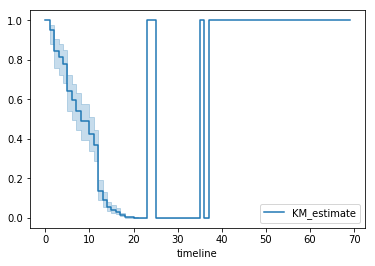

In [19]:
kmf = KaplanMeierFitter()
kmf.fit([x for x in T_all], event_observed=[x for x in T_all])
print(kmf.median_)
print(kmf.survival_function_)
kmf.plot()

inf
          KM_estimate
timeline             
0.0          1.000000
1.0          0.930556
2.0          0.875000
3.0          0.834615
5.0          0.704207
6.0          0.499760
9.0          0.423525
11.0         0.343201
12.0         0.270948
16.0         0.193535
18.0         0.130196
19.0         0.084386
20.0         0.052542
21.0         0.031323
22.0         0.017811
24.0         0.000712
31.0         0.000252
36.0         1.000000
37.0         1.000000
41.0         1.000000
42.0         1.000000
47.0         1.000000
48.0         1.000000
49.0         1.000000
50.0         1.000000
51.0         1.000000
52.0         1.000000
53.0         1.000000
54.0         1.000000
55.0         1.000000
56.0         1.000000
57.0         1.000000
58.0         1.000000
59.0         1.000000
61.0         1.000000
62.0         1.000000
65.0         1.000000
66.0         1.000000


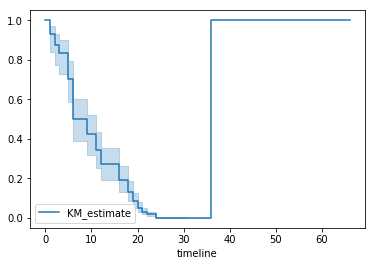

In [20]:
kmf = KaplanMeierFitter()
kmf.fit([x for x in T_one], event_observed=[x for x in T_one])
print(kmf.median_)
print(kmf.survival_function_)
kmf.plot()

In [21]:
T = df['T']
E = df['E']

In [22]:
print([x for x in E])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [23]:
print([x for x in T])

[6.0, 13.0, 13.0, 13.0, 19.0, 19.0, 19.0, 26.0, 26.0, 26.0, 26.0, 26.0, 33.0, 33.0, 47.0, 62.0, 62.0, 9.0, 9.0, 9.0, 15.0, 15.0, 22.0, 22.0, 22.0, 22.0, 29.0, 29.0, 29.0, 29.0, 29.0, 36.0, 36.0, 43.0, 33.0, 54.0, 54.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 32.0, 53.0, 53.0, 60.0, 60.0, 60.0, 60.0, 60.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 75.0, 17.0, 51.0, 51.0, 51.0, 58.0, 58.0, 58.0, 58.0, 66.0, 66.0, 7.0, 7.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 69.0, 69.0, 38.0, 38.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 53.0, 53.0, 53.0, 53.0, 53.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 66.0]


In [24]:
kmf.fit([x for x in T], event_observed=[x for x in E])

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [25]:
kmf.median_

56.0

In [26]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690
15.0,0.938344
17.0,0.932170
19.0,0.913650
22.0,0.888957


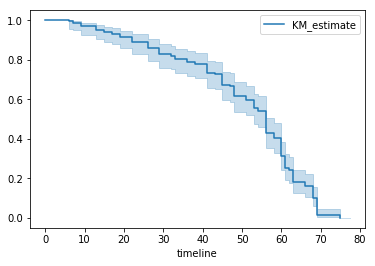

In [27]:
kmf.plot()